# Exploratory Data Analysis - EDA

We start the analysis of our database by first analyzing the Data Frame. Our objective is to perform an exploratory analysis, studying the data, looking for possible patterns, visualizing statistical data and finding possible relationships that will be useful to understand the context of the Data Frame and later for our classification model.


We expect to obtain basic information of the data frame and deeper informatcion about our __Target Seguro de Hogar__

We will load the libraries that we are going to use for our model as we need them

In [2]:
# Library that allows working with data structured in rows and columns.
import pandas as pd

In [2]:
# We read the database and associate to the variable df the data set
df = pd.read_csv('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Cleanning & Merging/df_cleanned.csv')

In [3]:
# We generate a random sample. We draw 5 rows on the screen using the sample function.
df.sample(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
287698,287699,70705.07,SI,NO,ASESOR FINANCIERO,3629.0,ASESORAMIENTO FINANCIERO,14948.0,NO,POCO USO,...,50.0,ALTO,ALTO RECORRIDO,1,118,0,0,0,0,0
141926,141927,1076.49,SI,NO,ASESOR FINANCIERO,13790.0,ASESORAMIENTO FINANCIERO,14588.0,SI,TRANSACCIONAL,...,21.0,MEDIO,MEDIO RECORRIDO,10,1020,0,0,0,0,0
29039,29040,9244.36,SI,NO,ASESOR FINANCIERO,57659.0,ASESORAMIENTO FINANCIERO,16037.0,SI,TRANSACCIONAL,...,41.0,ALTO,ALTO RECORRIDO,2,212,0,0,0,0,0
429372,429373,2827.32,SI,NO,ASESOR FINANCIERO,30273.0,ASESORAMIENTO FINANCIERO,16292.0,SI,TRANSACCIONAL,...,42.0,ALTO,ALTO RECORRIDO,4,425,1,0,0,0,0
83170,83171,1250.00,SI,NO,ASESOR FINANCIERO,23141.0,TUTELA,42881.0,NO,SIN USO,...,11.0,BAJO,NO CALCULADO,10,1013,0,0,0,0,0


In [4]:
# Print Dimension and Shape of the Data Frame. 
# The database consists of 451,374 rows, 30 columns / Features and 13.5mm of data.
print('Filas = ', df.shape[0])
print('Columnas = ', df.shape[1])
print('Datos = ',df.size)

Filas =  451374
Columnas =  30
Datos =  13541220


In [5]:
# Identify the name of the columns 
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

In [6]:
# The info method displays a summary of our dataframe.
# It includes information about the type of row indexes, column indexes and non-null values. 
# dtypes - int64(13), object(10), float64(7)
# Finally it offers us information of the used memory: 103.3+ MB
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451374 entries, 0 to 451373
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   cliente             451374 non-null  int64  
 1   saldo_captacion     451374 non-null  float64
 2   esta_carterizado    451374 non-null  object 
 3   cliente_bbp         451374 non-null  object 
 4   tipo_gestor         451374 non-null  object 
 5   gestor              451374 non-null  float64
 6   cartera_patron      451374 non-null  object 
 7   codigo_cartera      451374 non-null  float64
 8   digital_3_meses     451374 non-null  object 
 9   camino_digital      451374 non-null  object 
 10  saldo_financiacion  451374 non-null  float64
 11  saldo_ffii          451374 non-null  float64
 12  saldo_plp           451374 non-null  float64
 13  lp_dom_ingresos     451374 non-null  int64  
 14  lp_tjta_cto         451374 non-null  int64  
 15  lp_tjt_rev          451374 non-nul

### Data Frame  is made up of 30 different variables, which we are going to segment and distinguish by blocks for a better study.

- Block 1 - Business unit variables 5 
- Block 2 - Age variables 1 
- Block 3 - Savings - Financing Variables 4 
- Block 4 - Services variables 5 
- Block 5 - Insurances variables 5
- Block 6 - Segmentation variables 10 

In [7]:
# Unify variables by blocks
age_variables = df['edad']
business_unit_variables = df[['cliente','gestor','codigo_cartera','oficina','dz']]
savings_financing_variables = df[['saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp']]
services_variables = df[['lp_dom_ingresos','lp_tjta_cto','lp_tjt_rev','lp_rbos','lp_of_int']]
insurances_variables = df[['lp_seg_vida','lp_seg_acc','lp_seg_salud','lp_seg_auto','lp_seg_hogar']]
segmentation_variables = df[['esta_carterizado','cliente_bbp','tipo_gestor','cartera_patron',
                            'marca_bp','marca_ccte','seg_valor','seg_recorrido','digital_3_meses','camino_digital']]

### We will study all the variables by blocks using visualization by histrograms and stadistic description

### Block 1  Bussines Unit variables - CONTEXT

In [8]:
# Load visualization librarys
import matplotlib.pyplot as plt
import seaborn as sns

### __Global Structure__

We will make a pyramidal portrait in order to understand the structure of the financial entity and on which our database rests

In [9]:
#  **** CONTEXTUAL MAP **** 
print('INFORMACION VARIABLES UNIDADES DE NEGOCIO')
print('-----------------------------------------')  
print('DZs Number:      ', df['dz'].nunique())
print('Offices Number: ', df['oficina'].nunique())
print('Consultans Number: ', df['gestor'].nunique())
print('Clients Number: ', df['cliente'].nunique())
print('How many are carterized:?')
print(df['esta_carterizado'].value_counts(normalize = True))


INFORMACION VARIABLES UNIDADES DE NEGOCIO
-----------------------------------------
DZs Number:       11
Offices Number:  162
Consultans Number:  458
Clients Number:  451374
How many are carterized:?
SI    0.904416
NO    0.095584
Name: esta_carterizado, dtype: float64


### Number of offices per DZ

Number of offices per DZ:  162
dz
1     15
2     13
3     17
4     16
5     17
6     15
7     13
8     11
9     16
10    15
11    14
Name: oficina, dtype: int64


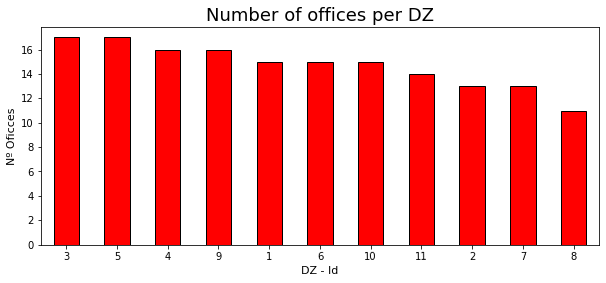

In [81]:
print('Number of offices per DZ: ',df.groupby('dz')['oficina'].nunique().sum())
print(df.groupby('dz')['oficina'].nunique())
numero_oficinas_por_dz = df.groupby('dz')['oficina'].nunique().sort_values(ascending = False)
numero_oficinas_por_dz.plot(kind = 'bar', legend = '', grid = False, color = 'r', 
                                           rot = True, edgecolor = 'black',  linewidth=1, figsize = (10,4))
plt.title('Number of offices per DZ', fontsize = 18)
plt.xlabel('DZ - Id', fontsize = 11)
plt.ylabel('Nº Oficces', fontsize = 11)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Number of offices per DZ.png', dpi=75,bbox_inches='tight')
plt.show()



### __Number of Clients per DZ__

Total Clients per DZ:  451374


count       11.000000
mean     41034.000000
std       8051.037175
min      21690.000000
25%      38337.500000
50%      42198.000000
75%      46634.500000
max      51468.000000
Name: cliente, dtype: float64

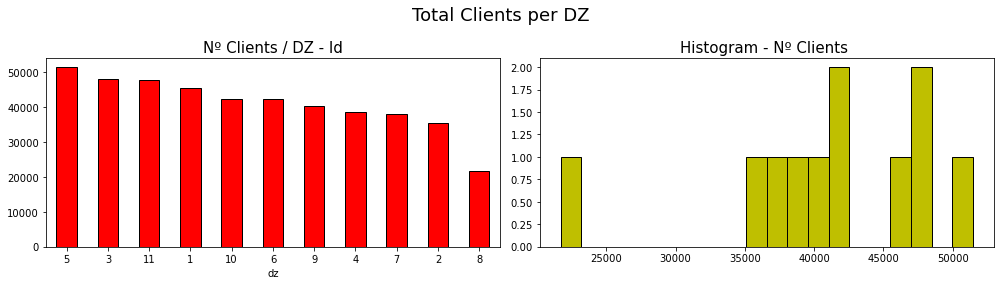

In [82]:
figure, axes = plt.subplots(1,2)
print('Total Clients per DZ: ', df['cliente'].nunique())

total_clients_per_dz = df.groupby('dz')['cliente'].nunique().sort_values(ascending = False)


total_clients_per_dz.plot(ax = axes[0], kind = 'bar',legend = '',grid = False, color = 'r',
                            rot = True, edgecolor = 'black',linewidth = 1 , figsize = (14,4))


total_clients_per_dz.hist(grid = False, color = 'y', bins = 20, 
                                  edgecolor = 'black',linewidth = 1 , figsize = (14,4), 
                                  legend = '')

axes[0].set_title('Nº Clients / DZ - Id', fontsize = 15)
axes[1].set_title('Histogram - Nº Clients ', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Number of clients per DZ.png', dpi=75,bbox_inches='tight')
plt.suptitle('Total Clients per DZ',fontsize = 18)
figure.tight_layout()
total_clients_per_dz.describe()


### __Clients per Office__

Total Clients per Office:  451374


count     162.000000
mean     2786.259259
std      1025.420335
min      1185.000000
25%      2000.500000
50%      2619.500000
75%      3357.000000
max      5755.000000
Name: cliente, dtype: float64

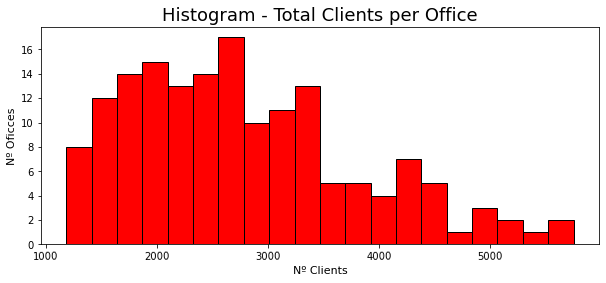

In [83]:
print('Total Clients per Office: ', df['cliente'].nunique())
total_Clients_per_Office = df.groupby('oficina')['cliente'].nunique().sort_values(ascending = False)
total_Clients_per_Office.plot(kind = 'hist',legend = '', grid = False, color = 'r',
                            rot = True, edgecolor = 'black',linewidth = 1 , figsize = (10,4), bins = 20);
plt.title('Histogram - Total Clients per Office', fontsize = 18)
plt.xlabel('Nº Clients', fontsize = 11)
plt.ylabel('Nº Oficces', fontsize = 11)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Total Clients per Office.png', dpi=75,bbox_inches='tight')
df.groupby('oficina')['cliente'].nunique().describe()

### __Consultants per DZ__

Total Consultants:  458


count    11.000000
mean     45.818182
std       8.931049
min      25.000000
25%      41.500000
50%      48.000000
75%      52.500000
max      55.000000
Name: gestor, dtype: float64

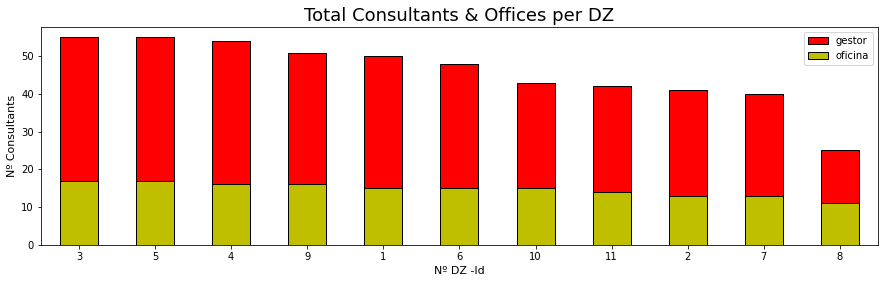

In [84]:
# Numero de gestores por DZ
print('Total Consultants: ', df['gestor'].nunique())
figure, axes = plt.subplots(1,1)
consultants_per_of = df.groupby('dz')['oficina'].nunique().sort_values(ascending = False)
consultants_per_dz = df.groupby('dz')['gestor'].nunique().sort_values(ascending = False)
consultants_per_dz.plot( kind = 'bar',legend = 'Reverse',grid = False, color = 'r', 
                            rot = True, edgecolor = 'black',linewidth = 1)

consultants_per_of.plot(kind = 'bar',legend = 'Reverse',grid = False, color = 'y', 
                           rot = True, edgecolor = 'black',linewidth = 1, figsize = (15,4),
                          xlabel = 'Nº Direcciones de Zona - Nº Gestores');
plt.title('Total Consultants & Offices per DZ', fontsize = 18)
plt.xlabel('Nº DZ -Id', fontsize = 11)
plt.ylabel('Nº Consultants', fontsize = 11)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Total Consultants & Offices per DZ.png', dpi=75,bbox_inches='tight')
df.groupby('dz')['gestor'].nunique().describe()

============================================================================================================= 

=============================================================================================================

### Block 2  Age variable

### __Clients Ages__

count    451374.000000
mean         58.268941
std          19.018368
min           0.000000
25%          45.000000
50%          60.000000
75%          73.000000
max         118.000000
Name: edad, dtype: float64

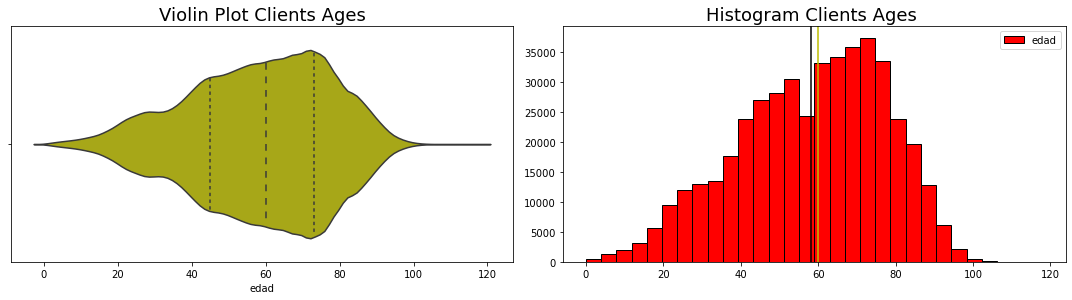

In [92]:
figure, axes = plt.subplots(1,2,figsize = (12,4))

age_variables.hist(color = 'r', bins = 30, grid = False, edgecolor = 'black', 
                    legend = 'Reverse', linewidth = 1, figsize = (15,4));

sns.violinplot(age_variables,ax = axes[0], color = 'y', inner="quartile")

plt.axvline(age_variables.mean(), color='black')
plt.axvline(age_variables.median(), color='y')
figure.tight_layout()

axes[0].set_title('Violin Plot Clients Ages', fontsize = 18)
axes[1].set_title('Histogram Clients Ages ', fontsize = 18)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Clients Ages.png', dpi=75,bbox_inches='tight')


age_variables.describe()

### __Clients segmentation by age__

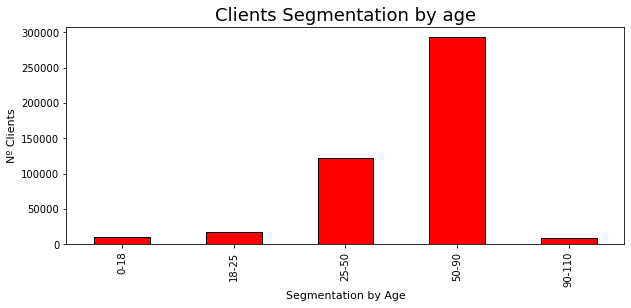

In [98]:
# We generate a new customer segmentation variable by age to see the age brackets.
# This segmentation serves for a possible decision to eliminate customers in certain age ranges from our model.
# Clients between 0 and 20 years old are not likely to have home insurance.
# Clients > 90 years old, given their advanced age, it is common for their children to be the policyholders.
df['age_segmentation'] = pd.cut(df.edad, bins = [0,18,25,50,90,110],
                     labels= ['0-18','18-25','25-50','50-90','90-110'])

age_segmentation = df['cliente'].groupby(df['age_segmentation']).count()

age_segmentation.plot(kind = 'bar', color = ('r'), grid = False, edgecolor = 'black', 
                           linewidth = 1, figsize = (10,4), fontsize = 10)
plt.title('Clients Segmentation by age', fontsize = 18)
plt.xlabel('Segmentation by Age', fontsize = 11)
plt.ylabel('Nº Clients', fontsize = 11)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Clients segmentation by age.png', dpi=75,bbox_inches='tight')
plt.show()


### __Summary__

- __We will eliminate clients between the age ranges 0-25 and 90 and above__.
- The reality when it comes to taking out home insurance is that minors and young people up to the age of 25 do not take out insurance because they simply do not have their own home.  
- As for clients over 90 years of age, given their advanced age, it is their children who are responsible for home insurance, so we are going to eliminate them from the model.


============================================================================================================= 

=============================================================================================================

### Block 3 - Savings - Financing Variables 

### __Savings - Financing Variables 'saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp'__


### __Possible correlations between the savings and financing variables themselves.__

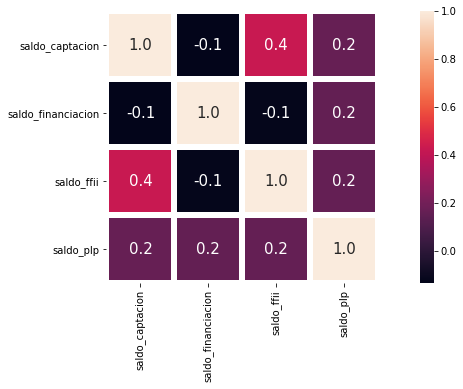

In [99]:
import seaborn as sns
correlation_mat = savings_financing_variables.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(15,5)) 
sns.heatmap(correlation_mat, annot = True, square = True, 
            linewidths=5, fmt=".1f",annot_kws={'size':15},ax=ax)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Correlations Savings-Financing.png', dpi=75,bbox_inches='tight')
plt.show()

### __Savings__

Nº Clients with savings:  436942
Nº Clients with savings > 1mm€:  215


count    4.513740e+05
mean     4.971455e+04
std      8.792364e+04
min     -5.104332e+04
25%      1.813182e+03
50%      1.520828e+04
75%      6.446964e+04
max      5.290216e+06
Name: saldo_captacion, dtype: float64

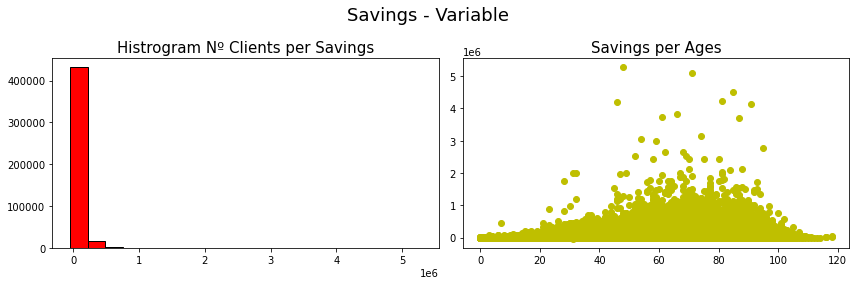

In [103]:
# Histogram clearly shows that the majority of clients have balances of less than €100,000.
# There are a small number of clients whose account balances amount to more than 1mm€.
# The average balance is less than €50,000.
# Group within a segmentation of the middle economic class

figure, axes = plt.subplots(1,2,figsize = (12,4))
print('Nº Clients with savings: ', df[df['saldo_captacion'] > 0 ]['cliente'].count())
print('Nº Clients with savings > 1mm€: ', df[df['saldo_captacion'] > 1e6 ]['cliente'].count())

df['saldo_captacion'].hist(ax = axes[0], color = 'r', bins = 20, grid = False, edgecolor = 'black', linewidth=1)
plt.scatter(df['edad'],df['saldo_captacion'],color = 'y');

axes[0].set_title('Histrogram Nº Clients per Savings', fontsize = 15)
axes[1].set_title('Savings per Ages', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Savings', dpi=75,bbox_inches='tight')
plt.suptitle('Savings - Variable',fontsize = 18)

figure.tight_layout()
df['saldo_captacion'].describe()

### __Financing__

Customers with loans: 223894
Customers with loans > 50.000€: 42860


count    4.513740e+05
mean     1.380668e+04
std      4.296438e+04
min     -4.900000e+03
25%      0.000000e+00
50%      0.000000e+00
75%      6.841775e+02
max      2.896317e+06
Name: saldo_financiacion, dtype: float64

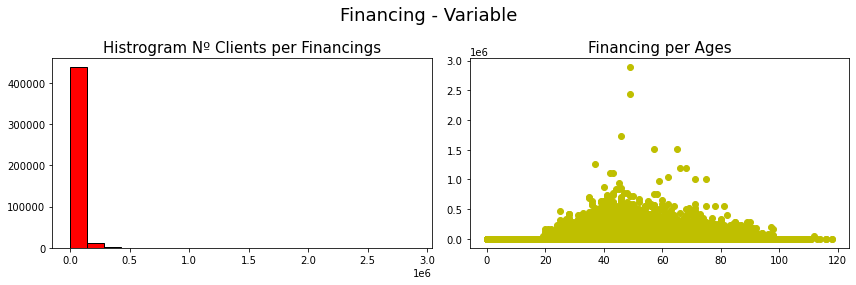

In [106]:
# We see at the beginning that there are customers with debtor financing (min = 4.900000e+03)
# Average financing balances of 13.000€.  
# Collective with consumer loans.

figure, axes = plt.subplots(1,2,figsize = (12,4))
print('Customers with loans:',df[df['saldo_financiacion'] > 1]['cliente'].count())
print('Customers with loans > 50.000€:',df[df['saldo_financiacion'] > 50000]['cliente'].count())

df['saldo_financiacion'].hist(ax = axes[0], color = 'r', bins = 20, grid = False, edgecolor = 'black', linewidth=1);
plt.scatter(df['edad'],df['saldo_financiacion'],color = 'y');

axes[0].set_title('Histrogram Nº Clients per Financings', fontsize = 15)
axes[1].set_title('Financing per Ages', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Financing', dpi=75,bbox_inches='tight')
plt.suptitle('Financing - Variable',fontsize = 18)

figure.tight_layout()
df['saldo_financiacion'].describe()

### __Investment funds__

Clients with Investment funds:  60932
Clients with Investment funds > 50.000€ :  23479


count    4.513740e+05
mean     8.483663e+03
std      3.844671e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.130940e+06
Name: saldo_ffii, dtype: float64

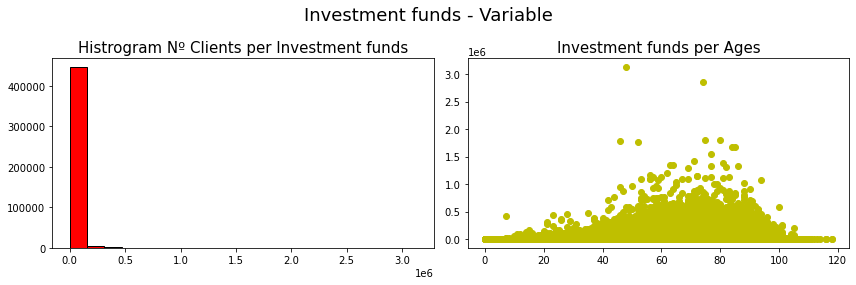

In [108]:
# Histogram clearly shows that the majority of clients have balances of less than €100,000.
# There are a small number of clients whose account balances amount to more than 1mm€.
# The average balance is less than €8,000.
# Non-priority savings method.

figure, axes = plt.subplots(1,2,figsize = (12,4))
print('Clients with Investment funds: ', df[df['saldo_ffii'] > 0]['cliente'].count())
print('Clients with Investment funds > 50.000€ : ', df[df['saldo_ffii'] > 50000]['cliente'].count())

df['saldo_ffii'].hist(ax = axes[0], color = 'r', bins = 20, grid = False, edgecolor = 'black', linewidth=1);
plt.scatter(df['edad'],df['saldo_ffii'],color = 'y');

axes[0].set_title('Histrogram Nº Clients per Investment funds', fontsize = 15)
axes[1].set_title('Investment funds per Ages', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Investment funds', dpi=75,bbox_inches='tight')
plt.suptitle('Investment funds - Variable',fontsize = 18)

figure.tight_layout()
df['saldo_ffii'].describe()

### __Future Savings__

Clients without future savings 404808
Clients with future savings > 100.000€: 1262


count    451374.000000
mean       1728.478326
std       10780.622435
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      459937.460000
Name: saldo_plp, dtype: float64

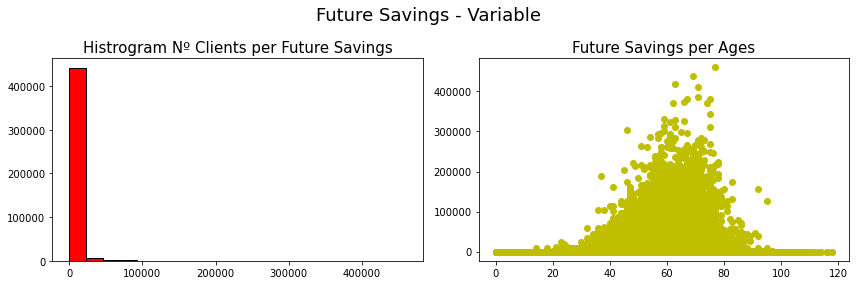

In [110]:
# Histogram clearly shows that the majority of clients have balances of less than €100,000.
# The average balance is less than €2,000.
# Non-priority method of future forecasting.

figure, axes = plt.subplots(1,2,figsize = (12,4))
print('Clients without future savings', df[df['saldo_plp'] == 0]['cliente'].count())
print('Clients with future savings > 100.000€:', df[df['saldo_plp'] > 1e5]['cliente'].count())

df['saldo_plp'].hist(ax = axes[0], color = 'r', bins = 20, grid = False, edgecolor = 'black', linewidth=1);
plt.scatter(df['edad'],df['saldo_plp'],color = 'y');

axes[0].set_title('Histrogram Nº Clients per Future Savings', fontsize = 15)
axes[1].set_title('Future Savings per Ages', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Future Savings', dpi=75,bbox_inches='tight')
plt.suptitle('Future Savings - Variable',fontsize = 18)

figure.tight_layout()
df['saldo_plp'].describe()

### __Summary.__
    
      - Total number of customers:  451374
      - Number of customers with ssavings: 436942
      - Number of Clients with loans: 223894
      - Number of Clients without Investment Funds: 390442
      - Number of Clients without Future savings: 404808

- In a first visualization with the histograms, we already detected that in the 4 headings, the majority of clients tend to have very low balances.
- Provision savings and retirement savings methods are not the clients' priorities.
- In relation to our Tarhet, the commercial reality is that the fact of having balances in __Investment Funds or Pension Plans__ is not one of the conditions that lead clients to take out Home Insurance or not. These two variables will be converted into boolean category variables. The values assigned will be 0 if you do not have and 1 if you have. In this way we will simplify the study.  
- Capture variable.  These are real values. We will only __modify the negative ones and give them the value of the mean__.
- As for __financing__, we see that 50% of customers do have financing. We keep the variable__ which can be useful for the model. Customers with debit balances we give them a value of 0€.

============================================================================================================= 

=============================================================================================================

### Block 4 services_variables

### __Salary, debits, credit cards and Internet App ownership__.
We visualize each of the variables in two aspects; Histogram and in the form of Scatter combined with the variable Age..

### __Possible correlations between services_variables themselves.__

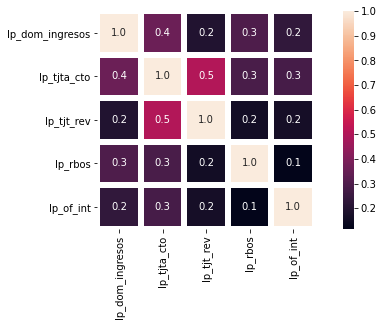

In [111]:
# Except for credit cards / revolving credit cards, there are no strong correlations between the variables themselves.

correlation_mat = services_variables.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(10,4)) 
sns.heatmap(correlation_mat, annot = True, square = True, 
            linewidths=5, fmt=".1f",annot_kws={'size':10},ax=ax)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Correlations Services_variables.png', dpi=75,bbox_inches='tight')
plt.show()

### __Salary__

% Clients with salary 0.71
          lp_dom_ingresos        
                    count     sum
edad                             
(0, 25]             27661    9013
(25, 50]           121987   89581
(50, 75]           212315  150816
(75, 90]            80580   62504
(90, 120]            8818    7264


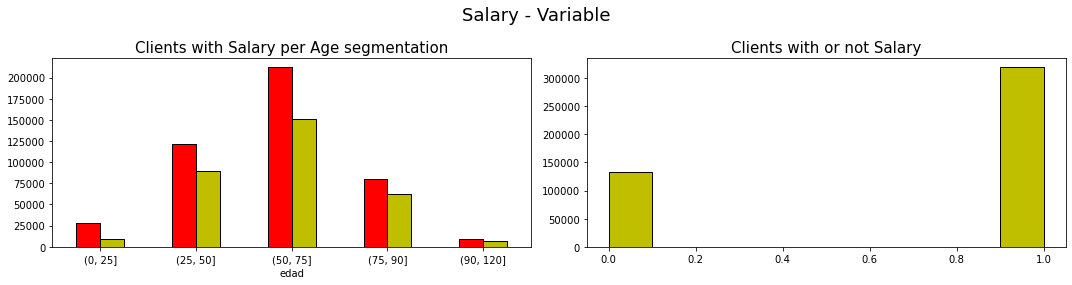

In [130]:
# Majority of customers with salary or pension between 25 and 90 years old.
# Good percentage of customers with Salary.

figure, axes = plt.subplots(1,2)
print ('% Clients with salary', df['lp_dom_ingresos'].value_counts(normalize = True)[1].round(2))
print(df.groupby(age_segmentation)[['lp_dom_ingresos']].agg(['count','sum']))

age_segmentation = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
df.groupby(age_segmentation)[['lp_dom_ingresos']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_dom_ingresos'].hist(figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clients with Salary per Age segmentation', fontsize = 15)
axes[1].set_title('Clients with or not Salary', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Salary', dpi=75,bbox_inches='tight')
plt.suptitle('Salary - Variable',fontsize = 18)
figure.tight_layout()


### __Domestic Bills__

% Clients with Debits 0.87
          lp_rbos        
            count     sum
edad                     
(0, 25]     27661    9382
(25, 50]   121987  103084
(50, 75]   212315  196207
(75, 90]    80580   76691
(90, 120]    8818    8169


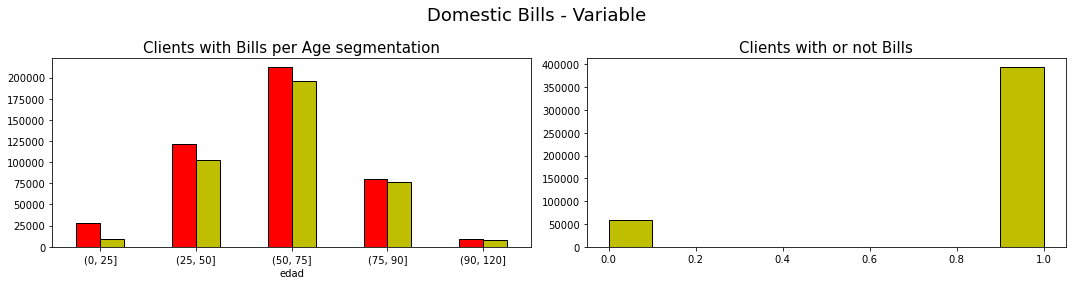

In [127]:
# Majority of customers with  debit service.
# High percentage of customers with the service.
# Cumulative number of customers between 25 and 90 years old.
figure, axes = plt.subplots(1,2)
print ('% Clients with Debits',df['lp_rbos'].value_counts(normalize = True)[1].round(2))
print(df.groupby(age_segmentation)[['lp_rbos']].agg(['count','sum']))

age_segmentation = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
df.groupby(age_segmentation)[['lp_rbos']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_rbos'].hist(figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clients with Bills per Age segmentation', fontsize = 15)
axes[1].set_title('Clients with or not Bills', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Domestic Bills', dpi=75,bbox_inches='tight')
plt.suptitle('Domestic Bills - Variable',fontsize = 18)
figure.tight_layout()


### __Internet App__

% Clients wtih App Internet 0.77
          lp_of_int        
              count     sum
edad                       
(0, 25]       27661   18593
(25, 50]     121987  112287
(50, 75]     212315  164809
(75, 90]      80580   49159
(90, 120]      8818    4138


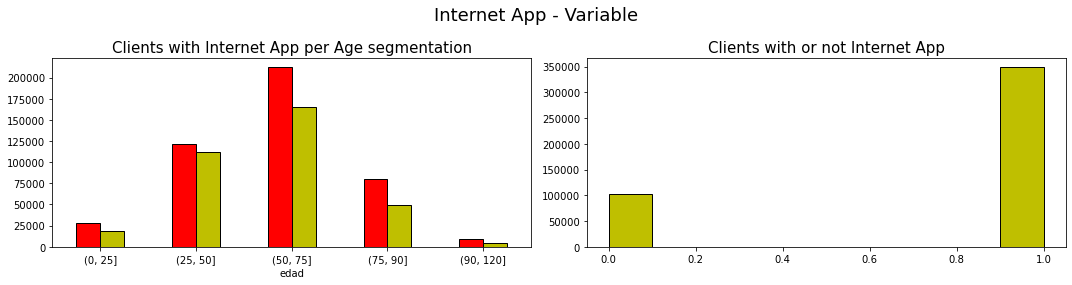

In [131]:
# Service access via APP to customer positions.
# High percentage of clients with the service.
# Accumulated in clients between 25 and 90 years old.

figure, axes = plt.subplots(1,2)
print ('% Clients wtih App Internet',df['lp_of_int'].value_counts(normalize = True)[1].round(2))
print(df.groupby(age_segmentation)[['lp_of_int']].agg(['count','sum']))

age_segmentation = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
df.groupby(age_segmentation)[['lp_of_int']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_of_int'].hist(figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clients with Internet App per Age segmentation', fontsize = 15)
axes[1].set_title('Clients with or not Internet App', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Internet App', dpi=75,bbox_inches='tight')
plt.suptitle('Internet App - Variable',fontsize = 18)
figure.tight_layout()


### __Credit Card__

% Clients with Credit Card 0.55
          lp_tjta_cto        
                count     sum
edad                         
(0, 25]         27661    2864
(25, 50]       121987   64390
(50, 75]       212315  137133
(75, 90]        80580   41694
(90, 120]        8818    2391


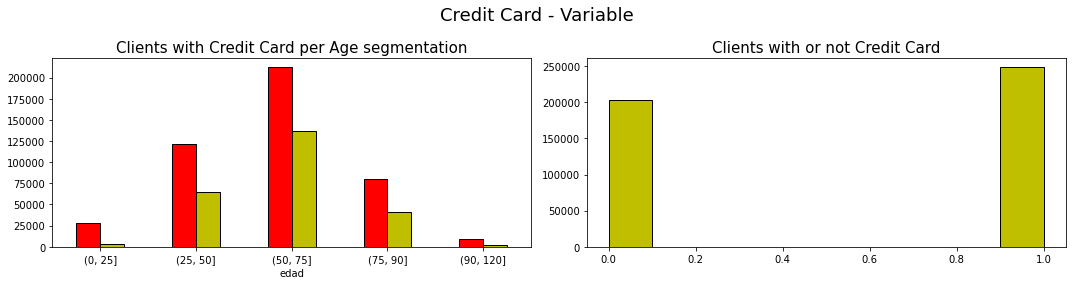

In [134]:
# 'Only 50% of customers have a credit card'.

figure, axes = plt.subplots(1,2)
print ('% Clients with Credit Card', df['lp_tjta_cto'].value_counts(normalize = True)[1].round(2))
print(df.groupby(age_segmentation)[['lp_tjta_cto']].agg(['count','sum']))
age_segmentation = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))

df.groupby(age_segmentation)[['lp_tjta_cto']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_tjta_cto'].hist(figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clients with Credit Card per Age segmentation', fontsize = 15)
axes[1].set_title('Clients with or not Credit Card', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Credit Card', dpi=75,bbox_inches='tight')
plt.suptitle('Credit Card - Variable',fontsize = 18)

figure.tight_layout()


### __Revolving Credit card__

% Clients with Revolving Credit Card 0.24
          lp_tjt_rev       
               count    sum
edad                       
(0, 25]        27661    994
(25, 50]      121987  26939
(50, 75]      212315  59209
(75, 90]       80580  19130
(90, 120]       8818    964


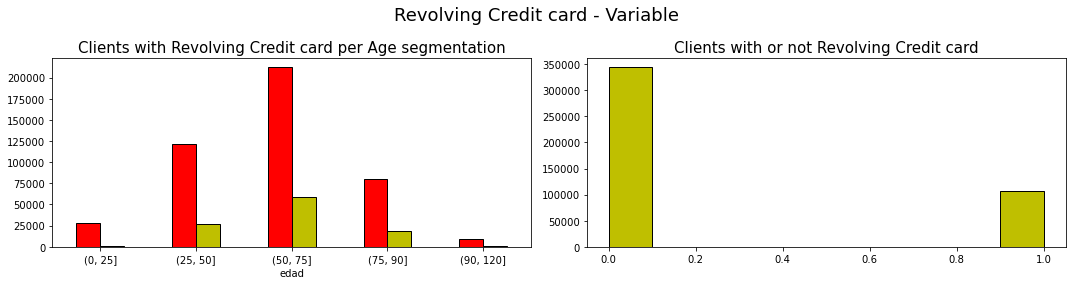

In [136]:
# Card very similar to the Credit Card. 
# 'Only 25% of customers have a credit card'.

figure, axes = plt.subplots(1,2)
print ('% Clients with Revolving Credit Card', df['lp_tjt_rev'].value_counts(normalize = True)[1].round(2))
print(df.groupby(age_segmentation)[['lp_tjt_rev']].agg(['count','sum']))
age_segmentation = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))

df.groupby(age_segmentation)[['lp_tjt_rev']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_tjt_rev'].hist(figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clients with Revolving Credit card per Age segmentation', fontsize = 15)
axes[1].set_title('Clients with or not Revolving Credit card', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Revolving Credit card', dpi=75,bbox_inches='tight')
plt.suptitle('Revolving Credit card - Variable',fontsize = 18)
figure.tight_layout()


### __Summary.__

VARIABLE INFORMATION SERVICES

    - Clients with Salary 0.71%.
    - Clients with Credit Card 0.55%.
    - Clients with Revolving Credit Card 0.24% 0.24% 0.24% 0.24
    - Clients with Debits 0.87% Clients with Direct Debits 0.87
    - Clients with Internet Service 0.77% Clients with Internet Service 0.77

- Within this block we are not going to eliminate any variable for the study of our model. All of them can be relevant.

- The two most important services, Direct Debit of Income and Bills, accumulate good contracting percentages.
- Looking at the % of tenure of these services, a great commercial potential can be observed.

============================================================================================================= 

=============================================================================================================

### Block 5 insurance Variables
We visualize each of the variables in two aspects; Histogram and combined with the Age variable to see how many customers within each of the age segments have insurance.

## __Home - Life - Accident - Auto - Health Insurance__.


### __Possible correlations between insurances variables themselves.__

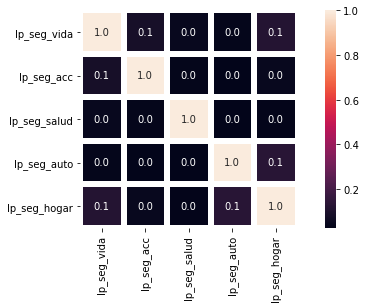

In [137]:
# No correlations between the variables.

correlation_mat = insurances_variables.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(10,4)) 
sns.heatmap(correlation_mat, annot = True, square = True, 
            linewidths=5, fmt=".1f",annot_kws={'size':10},ax=ax)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Correlations Risk Insurances', dpi=75,bbox_inches='tight')
plt.show()

## __Life Insurance__

% Clients with Life insurance 0.08
          lp_seg_vida       
                count    sum
edad                        
(0, 25]         27661    967
(25, 50]       121987  24373
(50, 75]       212315  12515
(75, 90]        80580      1
(90, 120]        8818      0


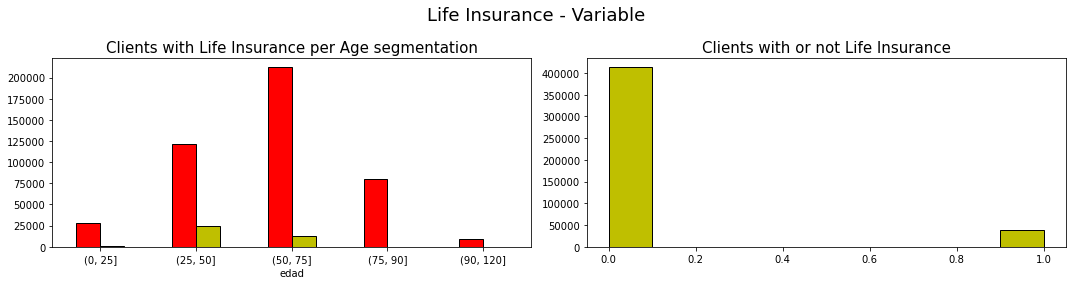

In [139]:
# Majority of clients without insurance.

figure, axes = plt.subplots(1,2)
print('% Clients with Life insurance',df['lp_seg_vida'].value_counts(normalize = True)[1].round(2))
print(df.groupby(age_segmentation)[['lp_seg_vida']].agg(['count','sum']))
age_segmentation = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))

df.groupby(age_segmentation)[['lp_seg_vida']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (12,4))

df['lp_seg_vida'].hist(ax = axes[1],figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clients with Life Insurance per Age segmentation', fontsize = 15)
axes[1].set_title('Clients with or not Life Insurance', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Life Insurance', dpi=75,bbox_inches='tight')
plt.suptitle('Life Insurance - Variable',fontsize = 18)
figure.tight_layout()

## __Accident insurances__

% Clients with accident insurances 0.02
          lp_seg_acc      
               count   sum
edad                      
(0, 25]        27661    86
(25, 50]      121987  2867
(50, 75]      212315  6035
(75, 90]       80580    38
(90, 120]       8818     0


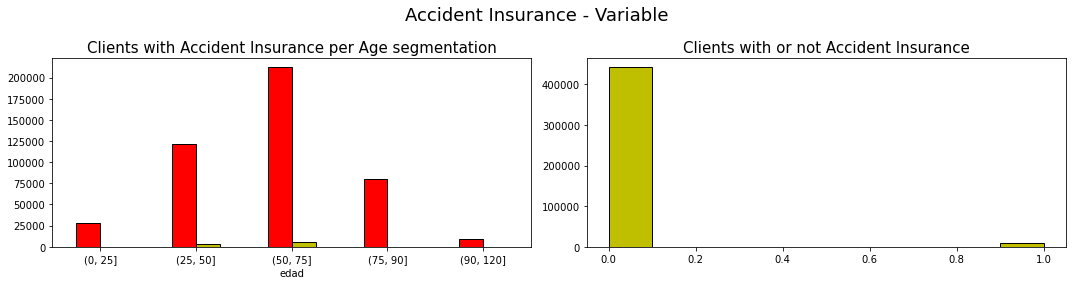

In [142]:
# Mayoria de clientes sin seguro contrado.

figure, axes = plt.subplots(1,2)
print('% Clients with accident insurances',df['lp_seg_acc'].value_counts(normalize = True)[1].round(2))
print(df.groupby(age_segmentation)[['lp_seg_acc']].agg(['count','sum']))

age_segmentation = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
df.groupby(age_segmentation)[['lp_seg_acc']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_seg_acc'].hist(ax = axes[1],figsize = (15,4), color = 'y',edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clients with Accident Insurance per Age segmentation', fontsize = 15)
axes[1].set_title('Clients with or not Accident Insurance', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Accident Insurance', dpi=75,bbox_inches='tight')
plt.suptitle('Accident Insurance - Variable',fontsize = 18)
figure.tight_layout()

## __Health insurances__

% Clients with health insurances 0.0
          lp_seg_salud      
                 count   sum
edad                        
(0, 25]          27661    53
(25, 50]        121987   793
(50, 75]        212315  1003
(75, 90]         80580    75
(90, 120]         8818     0


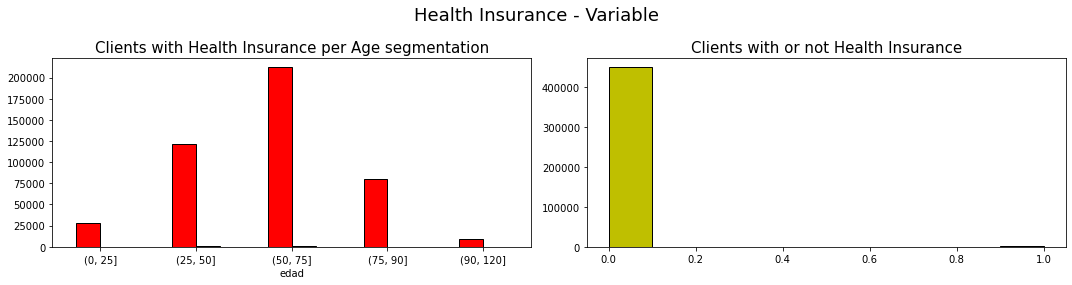

In [144]:
# Majority of clients without insurance.

figure, axes = plt.subplots(1,2)
print('% Clients with health insurances',df['lp_seg_salud'].value_counts(normalize = True)[1].round(2))
print(df.groupby(age_segmentation)[['lp_seg_salud']].agg(['count','sum']))

age_segmentation = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
df.groupby(age_segmentation)[['lp_seg_salud']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_seg_salud'].hist(ax = axes[1],figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clients with Health Insurance per Age segmentation', fontsize = 15)
axes[1].set_title('Clients with or not Health Insurance', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Health Insurance', dpi=75,bbox_inches='tight')
plt.suptitle('Health Insurance - Variable',fontsize = 18)
figure.tight_layout()

## __Car insurance__

% Clients with Car insurance 0.01
          lp_seg_auto      
                count   sum
edad                       
(0, 25]         27661     9
(25, 50]       121987  1482
(50, 75]       212315  3762
(75, 90]        80580   974
(90, 120]        8818     5


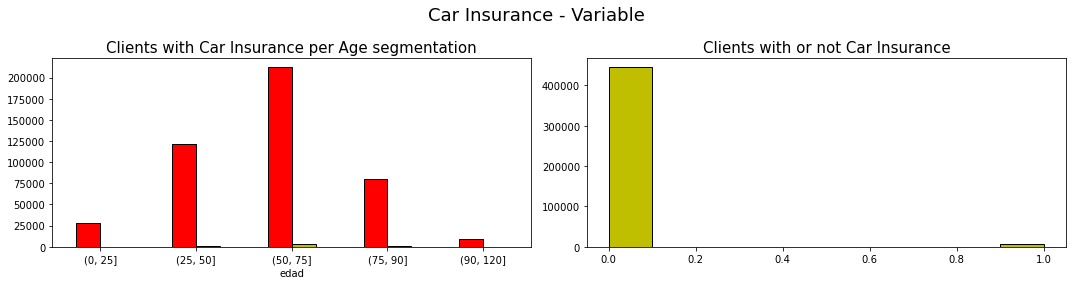

In [146]:
#  Majority of clients without insurance.

figure, axes = plt.subplots(1,2)
print('% Clients with Car insurance',df['lp_seg_auto'].value_counts(normalize = True)[1].round(2))
print(df.groupby(age_segmentation)[['lp_seg_auto']].agg(['count','sum']))

age_segmentation = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
df.groupby(age_segmentation)[['lp_seg_auto']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_seg_auto'].hist(ax = axes[1],figsize = (15,4), color = 'y',edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clients with Car Insurance per Age segmentation', fontsize = 15)
axes[1].set_title('Clients with or not Car Insurance', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Car Insurance', dpi=75,bbox_inches='tight')
plt.suptitle('Car Insurance - Variable',fontsize = 18)
figure.tight_layout()

## __Home insurance - TARGET__

% Clientes con Seguro Hogar 0.13 --TARGET
          lp_seg_hogar       
                 count    sum
edad                         
(0, 25]          27661     78
(25, 50]        121987  15337
(50, 75]        212315  27874
(75, 90]         80580  14217
(90, 120]         8818   1305


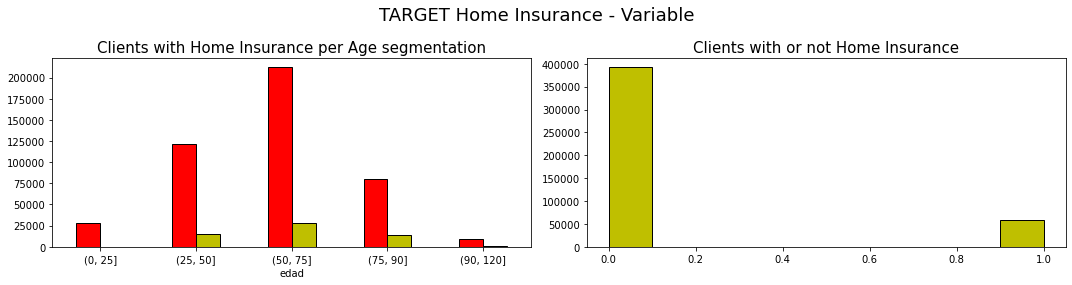

In [148]:
# Majority of clients without insuranc

figure, axes = plt.subplots(1,2)
print('% Clientes con Seguro Hogar',df['lp_seg_hogar'].value_counts(normalize = True)[1].round(2), '--TARGET')
print(df.groupby(age_segmentation)[['lp_seg_hogar']].agg(['count','sum']))

age_segmentation = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
df.groupby(age_segmentation)[['lp_seg_hogar']].agg(['count','sum']).plot(ax = axes[0],kind ='bar',
                                    legend = '', grid = False, color = ('r','y'), rot = 0, 
                                     edgecolor = 'black', linewidth=1, figsize = (10,4))

df['lp_seg_hogar'].hist(ax = axes[1],figsize = (15,4), color = 'y', edgecolor = 'black',  linewidth = 1, grid = False)

axes[0].set_title('Clients with Home Insurance per Age segmentation', fontsize = 15)
axes[1].set_title('Clients with or not Home Insurance', fontsize = 15)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Home Insurance', dpi=75,bbox_inches='tight')
plt.suptitle('TARGET Home Insurance - Variable',fontsize = 18)
figure.tight_layout()

__Summary.__



    - % Clients with Life Insurance 0.08
    - % Clients with Accident Insurance 0.02
    - % Clients with Health Insurance 0.0
    - % Customers with Auto Insurance 0.01
    - % Customers with Home Insurance 0.13 --TARGET

- We can see that most of the customers do not have insurance policies.
- This is a real commercial opportunity since the reality is that in any house or family it is normal that there is one or two vehicles, the head of the family has a life insurance or the family has a health insurance.  This very low percentage of insurance ownership indicates that they probably have them in another financial institution or insurance company. 


============================================================================================================= 

=============================================================================================================

###  Block 6 Segmentation_variables

__Customer targeting - commercial route - Internet segmentation__.

__Summary.__

- 90 % Customers carterized - Removed from the model
- No BBP customers - Removed from the model

In [55]:
print('SEGMENTATION VARIABLES')
print('====================================')
for variable in segmentation_variables:
    print(variable.upper(),':::')
    print(df[variable].value_counts(normalize = True))
    print('------------------------------------')

SEGMENTATION VARIABLES
ESTA_CARTERIZADO :::
SI    0.904416
NO    0.095584
Name: esta_carterizado, dtype: float64
------------------------------------
CLIENTE_BBP :::
NO    1.0
Name: cliente_bbp, dtype: float64
------------------------------------
TIPO_GESTOR :::
ASESOR FINANCIERO          0.894690
SIN GESTOR                 0.095584
SUBDIRECCIÓN DE OFICINA    0.009726
Name: tipo_gestor, dtype: float64
------------------------------------
CARTERA_PATRON :::
ASESORAMIENTO FINANCIERO    0.697767
TUTELA                      0.206649
SIN CARTERA                 0.095584
Name: cartera_patron, dtype: float64
------------------------------------
MARCA_BP :::
NO    0.720633
SI    0.279367
Name: marca_bp, dtype: float64
------------------------------------
MARCA_CCTE :::
AF           0.612485
SIN MARCA    0.270126
CCTE         0.117388
Name: marca_ccte, dtype: float64
------------------------------------
SEG_VALOR :::
ALTO     0.552963
MEDIO    0.298890
BAJO     0.148148
Name: seg_valor, dtype: 

============================================================================================================= 

=============================================================================================================

#  Feature Importances

###  Feature Importances with RandomForest

In [149]:
# Read again de DF
df = pd.read_csv('D:/Masters y Cursos/TFM/Financial-Product-Sales-Forecast-Model/Cleanning & Merging/df_cleanned.csv')

In [150]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [151]:
segmentation_variables = df[['cartera_patron','marca_bp','marca_ccte','seg_valor','seg_recorrido',
                        'esta_carterizado','tipo_gestor','digital_3_meses','camino_digital']]

In [152]:
for segmento in segmentation_variables:
    df[segmento]=lbl.fit_transform(df[segmento])

In [153]:
df.head(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,1,NO,0,18287.0,0,14881.0,1,0,...,69.0,0,1,2,210,0,0,0,1,0
1,2,1142234.34,1,NO,0,18287.0,0,14881.0,1,0,...,81.0,0,0,2,210,0,0,0,0,0
2,3,1142234.34,1,NO,0,18287.0,2,28332.0,0,3,...,75.0,0,1,2,210,0,0,0,0,0
3,4,1340503.88,1,NO,0,41475.0,0,14204.0,0,3,...,94.0,0,1,2,210,0,0,0,0,0
4,5,1758517.70,1,NO,0,39000.0,0,14219.0,1,0,...,64.0,0,1,2,210,0,0,0,0,0


In [154]:
# We eliminate business unit variables.
df = df[['edad','saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp',
              'lp_dom_ingresos','lp_tjta_cto','lp_tjt_rev','lp_rbos','lp_of_int',
              'cartera_patron','marca_bp','marca_ccte','seg_valor','seg_recorrido',
              'esta_carterizado','tipo_gestor','digital_3_meses','camino_digital',
              'lp_seg_vida','lp_seg_acc','lp_seg_salud','lp_seg_auto','lp_seg_hogar']]

In [155]:
X = df.drop(['lp_seg_hogar'], axis = 1)
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 10381602 (451374, 23)
Datos y = 451374 (451374,)


In [156]:
from sklearn.model_selection import train_test_split
test_size = 0.2
seed = 47
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

 1) saldo_captacion                0.279079
 2) saldo_financiacion             0.169123
 3) edad                           0.154577
 4) seg_valor                      0.076552
 5) saldo_ffii                     0.054786
 6) saldo_plp                      0.053133
 7) lp_dom_ingresos                0.026537
 8) camino_digital                 0.024198
 9) seg_recorrido                  0.022719
10) marca_ccte                     0.021080
11) lp_seg_vida                    0.018652
12) lp_seg_auto                    0.013138
13) cartera_patron                 0.012169
14) marca_bp                       0.012156
15) lp_tjta_cto                    0.011191
16) lp_tjt_rev                     0.010838
17) lp_seg_acc                     0.010216
18) digital_3_meses                0.007651
19) lp_rbos                        0.007175
20) lp_of_int                      0.006659
21) tipo_gestor                    0.003427
22) lp_seg_salud                   0.003167
23) esta_carterizado            

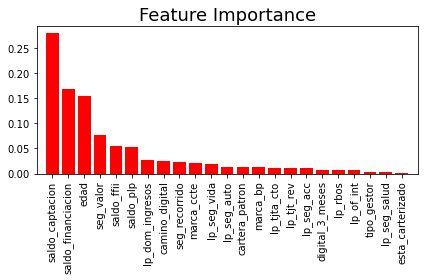

In [159]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
feat_labels = df.columns[:-1]
forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance',fontsize = 18)
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center',color = 'r')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Feature importances', dpi=100,bbox_inches='tight')
plt.tight_layout()

plt.show()

We look graphically for possible correlations between the variables. 


### Correlations between Variables (with segment variables)

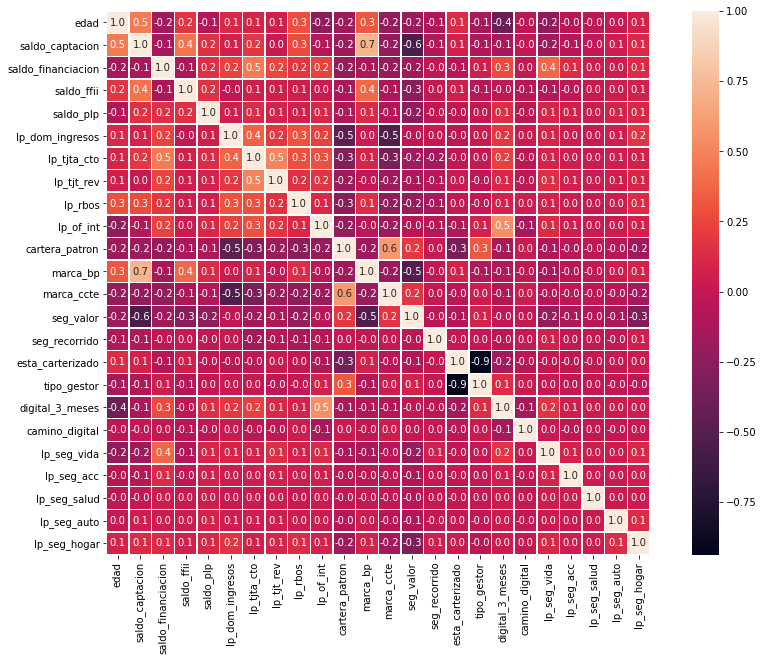

In [161]:
import seaborn as sns
correlation_mat = df.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(correlation_mat, annot = True, square = True, 
            linewidths=.5, fmt=".1f",annot_kws={'size':10},ax=ax)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA- Correlations -ALL', dpi=75,bbox_inches='tight')
plt.show()


__Summary.__

- We used the spearman correlation table, the result of which yields higher correlations than the other methods.
- The correlation between the variables is generally low. There are even negative correlations but also low
- Business Unit variables have not been used.
- Variables that we eliminated from the model because of low importance.
    - 18) digital_3_months 0.007651
    - 19) lp_rbos 0.007175
    - 20) lp_of_int 0.006659
    - 21) manager_type 0.003427
    - 22) lp_health_sec 0.003167
    - 23) carterized_sta_sta 0.001778
- Variables to eliminate from the model due to high correlation with other variables.
    - 13) portfolio_pattern 0.012169 Correlation with 10) brand_ccte 0.021080

============================================================================================================= 

=============================================================================================================

## __TARGET STUDY__ Home Insurance

- What is the structure of the Target 
- Are all the variables important? 
- How does it relate to the rest of the variables
- Can we discard any variable for the model?

In [162]:
# Read again de DF
df = pd.read_csv('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Cleanning & Merging/df_cleanned.csv')

## Target Structure

In [163]:
# Binary Variable.  1 Has Insurance - 0 Does not have Insurance
df['lp_seg_hogar'].unique()

array([1, 0], dtype=int64)

## __Correlation between other variables__

lp_seg_hogar          1.000000
lp_dom_ingresos       0.177929
lp_rbos               0.133464
lp_seg_auto           0.132036
saldo_captacion       0.127449
saldo_financiacion    0.123231
lp_seg_vida           0.118517
saldo_plp             0.115034
lp_tjt_rev            0.106714
edad                  0.087744
lp_of_int             0.082749
saldo_ffii            0.075671
lp_tjta_cto           0.070634
lp_seg_acc            0.048611
lp_seg_salud          0.031651
gestor                0.007628
dz                   -0.032331
oficina              -0.033456
cliente              -0.039775
codigo_cartera       -0.080364
Name: lp_seg_hogar, dtype: float64


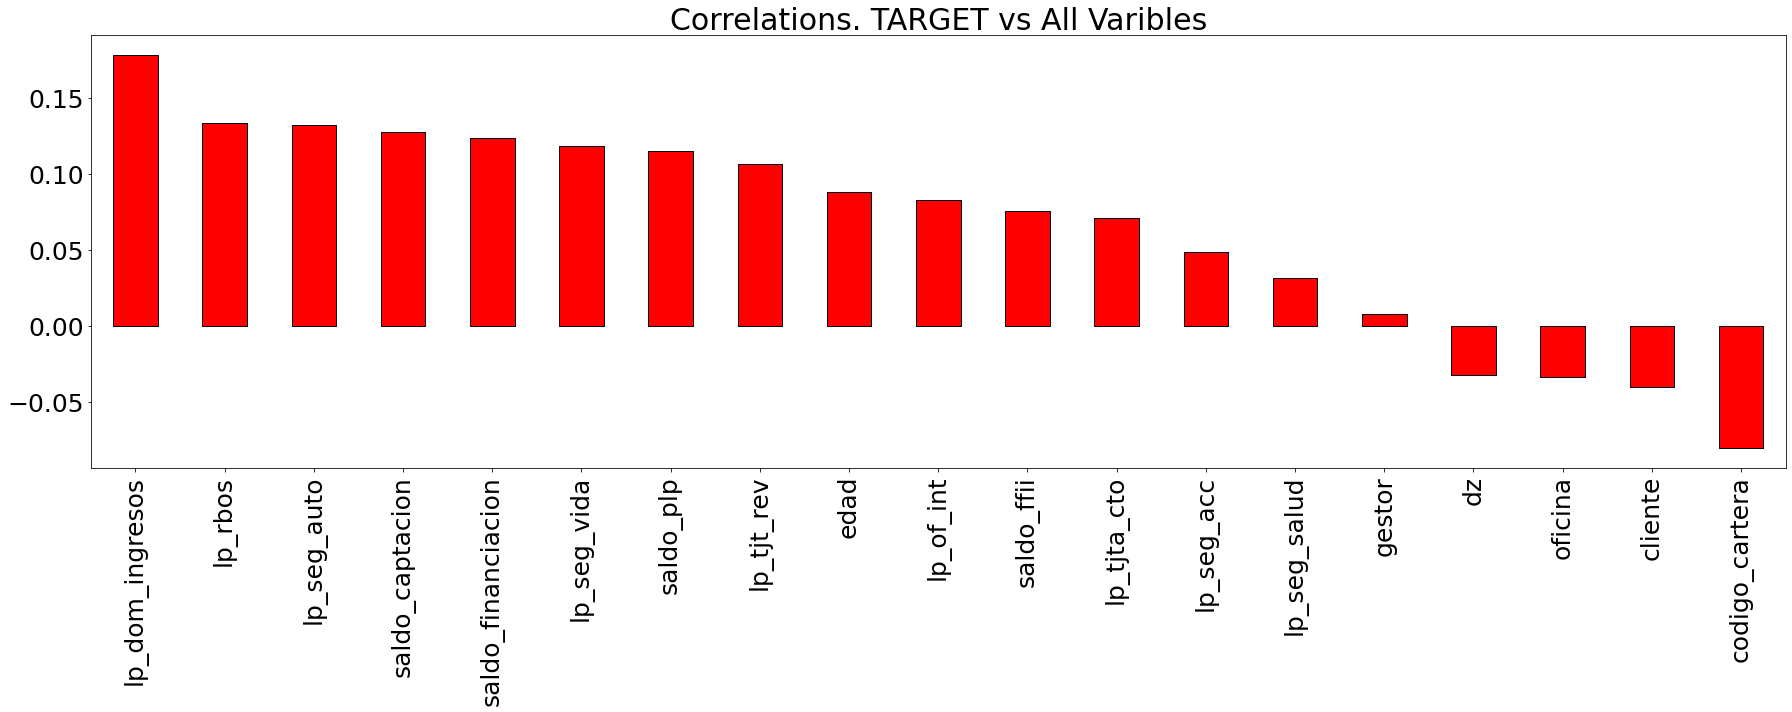

In [167]:
correlation_mat = df.corr(method = 'spearman')
corr_pairs = correlation_mat['lp_seg_hogar'].sort_values(ascending = False)
print(corr_pairs)
corr_pairs[1:].plot(kind ='bar',grid = False, color = 'r',edgecolor = 'black', linewidth=1,
                             rot = 90, figsize = (25,10), fontsize = 25)

plt.title('Correlations. TARGET vs All Varibles', fontsize = 30)

plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Correlations TARGET vs All Varibles.png', dpi=75,bbox_inches='tight')

plt.tight_layout()
plt.show()

## __Target unbalance__

0    0.869707
1    0.130293
Name: lp_seg_hogar, dtype: float64
% Clients with Home insurance 0.13 --TARGET


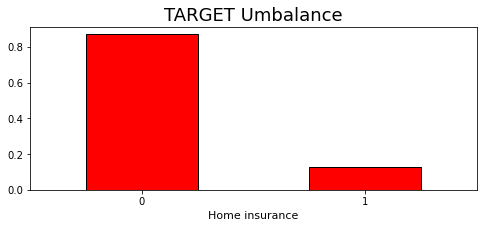

In [170]:
# We plot the unbalance of the Target variable for a better visualization.
# We see % and number of customers
# Target clearly unbalanced. In our model it should be taken into account.
home_insurance = pd.value_counts(df['lp_seg_hogar'], sort = True, normalize = True)
print (home_insurance)
home_insurance.plot(kind = 'bar', rot = 0, color = 'r' ,edgecolor = 'black', linewidth=1, figsize = (8,3))
print('% Clients with Home insurance',df['lp_seg_hogar'].value_counts(normalize = True)[1].round(2), '--TARGET')

plt.title('TARGET Umbalance', fontsize = 18)
plt.xlabel('Home insurance',fontsize = 11)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-TARGET Umbalance.png', dpi=75,bbox_inches='tight')
plt.show()


## __Clients with Home insurance per DZ__

In [43]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/0rigin_data/cleanned_data/df.tfm')

Total clients with & without Home insurance:
0    392563
1     58811
Name: lp_seg_hogar, dtype: int64


count      11.000000
mean     5346.454545
std      1523.625568
min      2274.000000
25%      4436.000000
50%      5957.000000
75%      6350.000000
max      7233.000000
Name: lp_seg_hogar, dtype: float64

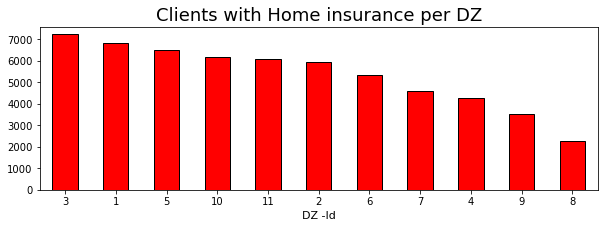

In [172]:
Home_insurance_per_DZ = df.groupby('dz')['lp_seg_hogar'].sum().sort_values(ascending = False)
Home_insurance_per_DZ.plot(kind ='bar',legend = '',grid = False, color = 'r',
                             rot = 0, edgecolor = 'black', linewidth=1, figsize = (10,3))

print ('Total clients with & without Home insurance:')
print (pd.value_counts(df['lp_seg_hogar']))

plt.title('Clients with Home insurance per DZ', fontsize = 18)
plt.xlabel('DZ -Id',fontsize = 11)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Clients with Home insurance per DZ.png', dpi=75,bbox_inches='tight')

Home_insurance_per_DZ.describe()

## __Clients with Home insurance by age segmentation__

          lp_seg_hogar       
                 count    sum
edad                         
(0, 25]          27661     78
(25, 50]        121987  15337
(50, 75]        212315  27874
(75, 90]         80580  14217
(90, 120]         8818   1305


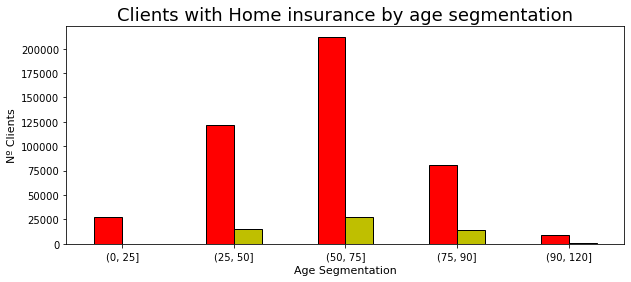

In [175]:
# Count reflects the total number of clients in the age segment.
# Sum reflects the number of clients with Home Insurance.
# In the model we eliminated customers 0-25 years old and > 90 years old because they are not represented in the home insurance.
age_segmentation = pd.cut(df['edad'], bins=(0, 25, 50, 75, 90, 120))
print(df.groupby(age_segmentation)[['lp_seg_hogar']].agg(['count','sum']))

df.groupby(age_segmentation)[['lp_seg_hogar']].agg(['count','sum']).plot(kind ='bar',legend = '',
                     grid = False, color = ('r','y'), rot = 0, edgecolor = 'black', linewidth=1, figsize = (10,4))

plt.title('Clients with Home insurance by age segmentation', fontsize = 18)
plt.ylabel('Nº Clients',fontsize = 11)
plt.xlabel('Age Segmentation',fontsize = 11)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Clients with Home insurance by age segmentation.png', dpi=75,bbox_inches='tight')
plt.show()


## __Clients by portfolio with Home insurance__

tipo_gestor              lp_seg_hogar
ASESOR FINANCIERO        0               349347
                         1                54493
SIN GESTOR               0                39209
                         1                 3935
SUBDIRECCIÓN DE OFICINA  0                 4007
                         1                  383
Name: cliente, dtype: int64


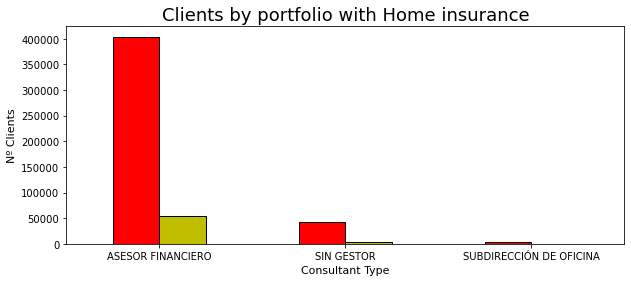

In [177]:
home_insurance_by_consultant_class = df.groupby('tipo_gestor')['lp_seg_hogar'].agg(['count','sum'])
print(df.groupby(['tipo_gestor', 'lp_seg_hogar'])['cliente'].nunique())
home_insurance_by_consultant_class.plot(kind ='bar',legend = '',grid = False, 
                                     color = ('r','y'), rot = 0, edgecolor = 'black', 
                                     linewidth=1, figsize = (10,4))

plt.title('Clients by portfolio with Home insurance', fontsize = 18)
plt.ylabel('Nº Clients',fontsize = 11)
plt.xlabel('Consultant Type',fontsize = 11)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Clients by portfolio with Home insurance.png', dpi=75,bbox_inches='tight')
plt.show()

## __Clients with Salary and Home Insurance__

lp_dom_ingresos  lp_seg_hogar
0                0               127275
                 1                 4921
1                0               265288
                 1                53890
Name: lp_seg_hogar, dtype: int64


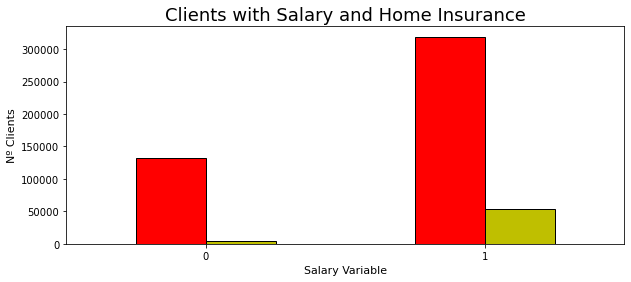

In [180]:
print(df.groupby('lp_dom_ingresos')['lp_seg_hogar'].value_counts())
df.groupby('lp_dom_ingresos')['lp_seg_hogar'].agg(['count','sum']).plot(kind ='bar',legend = '',
                     grid = False, color = ('r','y'), rot = 0, edgecolor = 'black', linewidth=1, figsize = (10,4))

plt.title('Clients with Salary and Home Insurance', fontsize = 18)
plt.ylabel('Nº Clients',fontsize = 11)
plt.xlabel('Salary Variable',fontsize = 11)
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/EDA-Clients with Salary and Home Insurance.png', dpi=75,bbox_inches='tight')
plt.show()

## __FINAL CONCLUSIONS EDA__ .Variables to be maintained and data to be modified

Block 1 - Variables business units. Our objective is to determine with the products that clients have whether they are likely to have or not to have home insurance. The Business Units should not influence the model. I therefore eliminate them from the model.

Block 2 - Age variables. I eliminate from the model clients from 0 to 25 years old and over 90 years old.

Block 3 - Savings - Financing variables. Investment funds and pension plans are booleanized.

Block 4 - Services Variables: Saluc Insurance, Accident Insurance and lp Internet.

Block 5 - Insurance Variables. All insurances will be used inside the model.

Block 6 - Segmentation Variables. Portfolio Pattern, Customers carterized and BBP are eliminated from the model.

30 original variables. 17 are kept including target.
- 1) saldo_captacion                0.279079
- 2) saldo_financiacion             0.169123
- 3) edad                           0.154577
- 4) seg_valor                      0.076552
- 5) saldo_ffii                     0.054786
- 6) saldo_plp                      0.053133
- 7) lp_dom_ingresos                0.026537
- 8) camino_digital                 0.024198
- 9) seg_recorrido                  0.022719
- 10) marca_ccte                     0.021080
- 11) lp_seg_vida                    0.018652
- 12) lp_seg_auto                    0.013138
- 14) marca_bp                       0.012156
- 15) lp_tjta_cto                    0.011191
- 16) lp_tjt_rev                     0.010838
- 17) lp_seg_acc                     0.01021


In [78]:
variables_X_finales =['saldo_captacion','saldo_financiacion','edad','seg_valor','saldo_ffii', 'saldo_plp', 
                      'lp_dom_ingresos','camino_digital','seg_recorrido','marca_ccte','lp_seg_vida',
                       'lp_seg_auto','marca_bp','lp_tjta_cto', 'lp_tjt_rev','lp_seg_acc']

target_y_final = 'seguro_hogar'
       
      